## VGG ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

2.6.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'datasets/train',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 4000 images belonging to 20 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'datasets/test',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2000 images belonging to 20 classes.


In [5]:
def vgg(input_shape, n_classes):
  
  input = Input(input_shape)
  
  x = Conv2D(64, 3, padding='same', activation='relu')(input)
  x = Conv2D(64, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model

input_shape = 224, 224, 3
n_classes = 20

K.clear_session()
model = vgg(input_shape, n_classes)
model.summary() 
        

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

In [6]:
model_path = "ALEXNET.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 100
batch_size = 512

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100
7/7 [==============================] - 230s 33s/step - loss: 4.1217 - accuracy: 0.0312 - precision: 0.0526 - val_loss: 2.9974 - val_accuracy: 0.0521 - val_precision: 0.0000e+00

Epoch 00001: accuracy improved from -inf to 0.03125, saving model to ALEXNET.h5
Epoch 2/100
7/7 [==============================] - 232s 34s/step - loss: 2.9984 - accuracy: 0.0312 - precision: 0.0000e+00 - val_loss: 2.9919 - val_accuracy: 0.0625 - val_precision: 0.0000e+00

Epoch 00002: accuracy did not improve from 0.03125
Epoch 3/100
7/7 [==============================] - 225s 33s/step - loss: 2.9956 - accuracy: 0.0848 - precision: 0.0000e+00 - val_loss: 2.9964 - val_accuracy: 0.0208 - val_precision: 0.0000e+00

Epoch 00003: accuracy improved from 0.03125 to 0.08482, saving model to ALEXNET.h5
Epoch 4/100
7/7 [==============================] - 224s 32s/step - loss: 3.0057 - accuracy: 0.0312 - precision: 0.0000e+00 - val_loss: 2.9896 - val_accuracy: 0.0417 - val_precision: 0.0000e+00

Epoch 00004: a

7/7 [==============================] - 218s 32s/step - loss: 2.9956 - accuracy: 0.0446 - precision: 0.0000e+00 - val_loss: 2.9975 - val_accuracy: 0.0521 - val_precision: 0.0000e+00

Epoch 00067: accuracy did not improve from 0.08929
Epoch 68/100
7/7 [==============================] - 219s 32s/step - loss: 2.9939 - accuracy: 0.0580 - precision: 0.0000e+00 - val_loss: 2.9963 - val_accuracy: 0.0312 - val_precision: 0.0000e+00

Epoch 00068: accuracy did not improve from 0.08929
Epoch 69/100
7/7 [==============================] - 219s 32s/step - loss: 2.9944 - accuracy: 0.0357 - precision: 0.0000e+00 - val_loss: 2.9987 - val_accuracy: 0.0312 - val_precision: 0.0000e+00

Epoch 00069: accuracy did not improve from 0.08929
Epoch 70/100
7/7 [==============================] - 219s 32s/step - loss: 2.9934 - accuracy: 0.0491 - precision: 0.0000e+00 - val_loss: 2.9961 - val_accuracy: 0.0521 - val_precision: 0.0000e+00

Epoch 00070: accuracy did not improve from 0.08929
Epoch 71/100
7/7 [===========

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

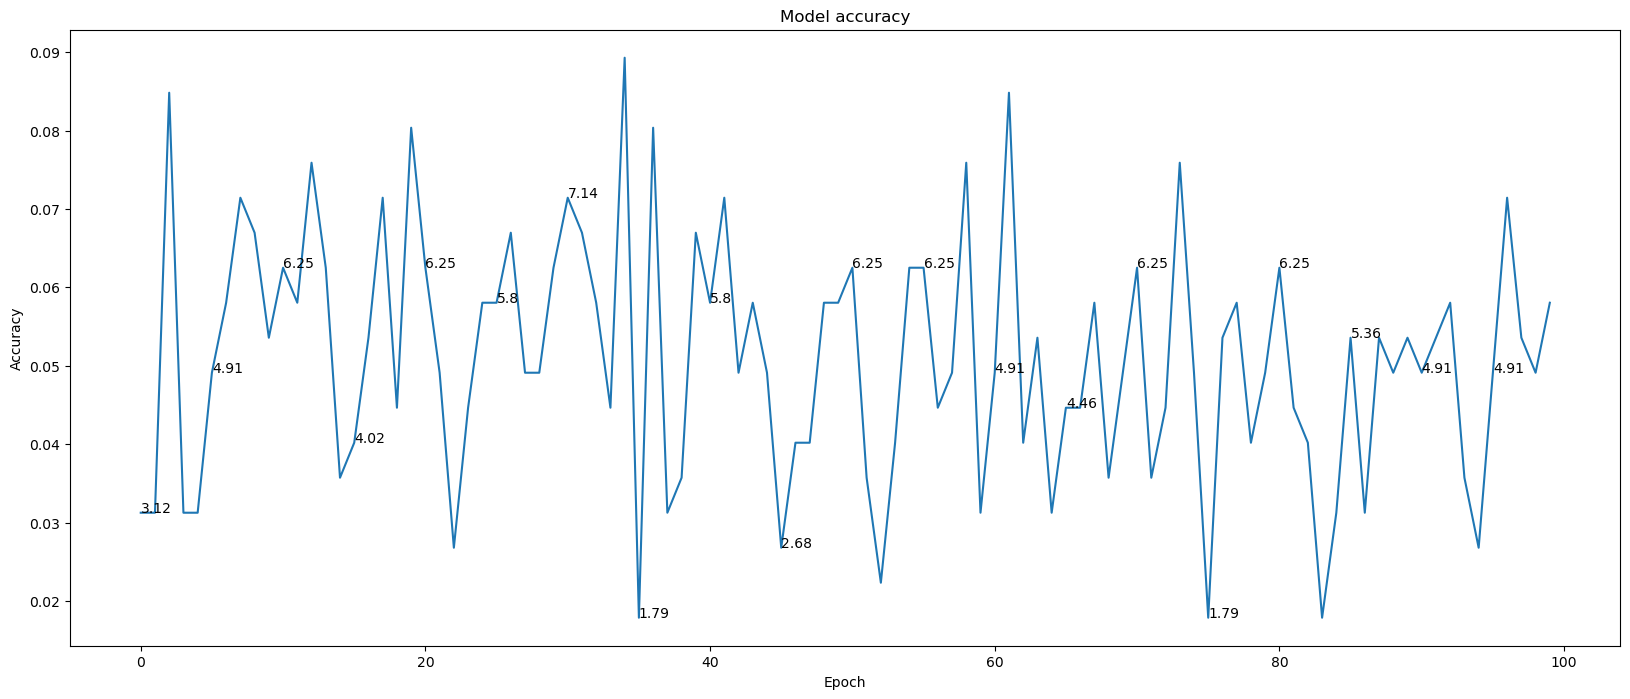

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

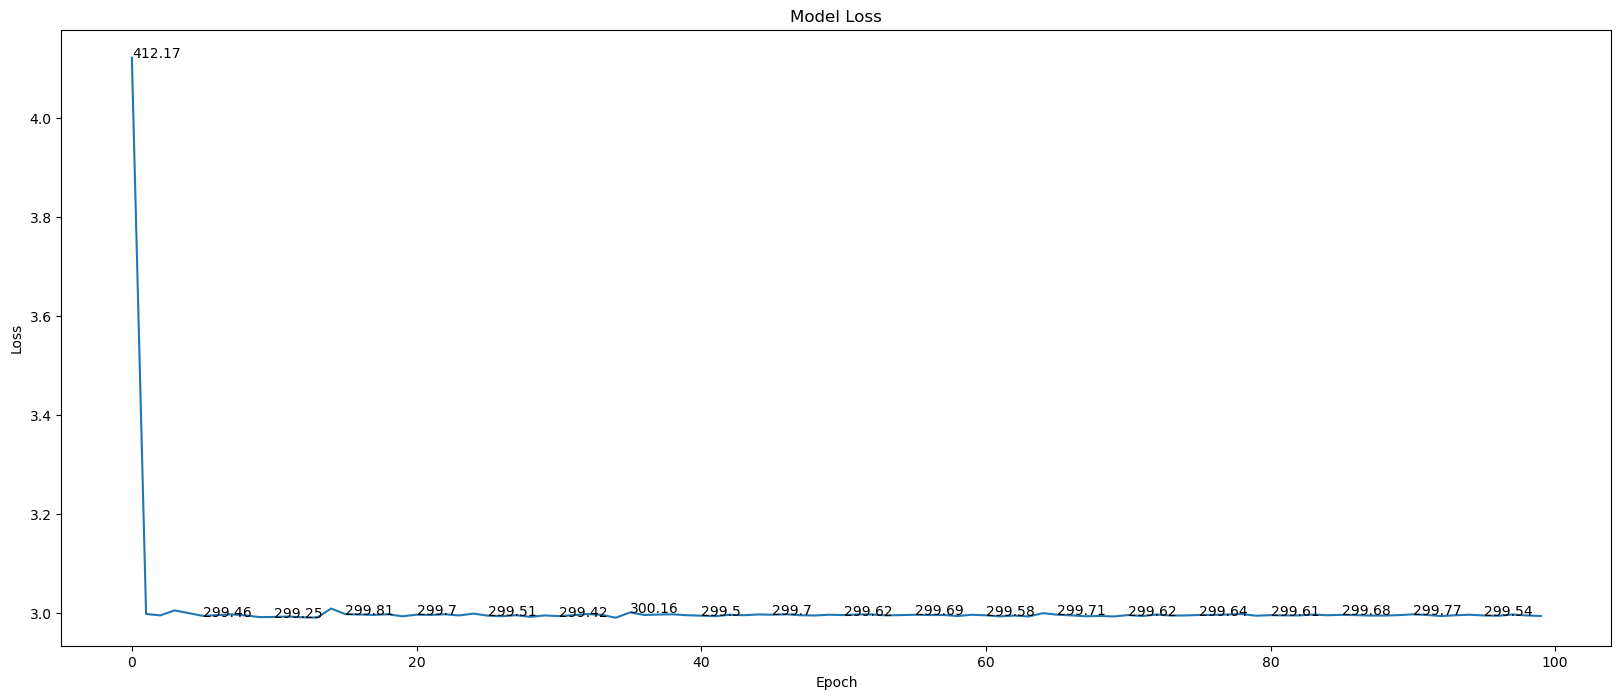

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()